#### Before you run this notebook, execute the cell below to add html styling!

In [1]:
%%html
<style>
.header1 {
  padding: 10px;
  text-align: center;
  background: #1abc9c;
  color: white;
    width: 90%;
}
.content1 {
    padding:10px;
    text-align: justify;
    background: #afd5cd;
    width: 90%;
}
</style>
<style>
.title {
  padding: 10px;
  text-align: center;
  background: #1abc9c;
  color: white;
    width: 90%;
</style>

# <div class="title">Predictions and Machine Learning</div>

<center><img src="https://github.com/jeshan49/EEMP2019/raw/master/content/part-5/part-5-1/ml.png" width="500"></center>

---
<center><span style="font-size:larger;">Prof. Dr. Dirk Sliwka, Lea Petters & Jesper Armouti-Hansen</span></center>
<center><span style="font-size:larger;">University of Cologne (2019/20)</span></center>

### How to run this notebook

- Click on the link on the course page:
    - Here you can view the notebook as an html file
    - Alternatively, click "Download" in the upper right corner, right click on the output and save the notebook as an .ipynb file
    - Then execute the following code to check whether you have all required packages installed:

In [2]:
#code that checks whether the required packages are installed
import subprocess
import sys

reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==')[0] for r in reqs.split()]
critical_packages = ['numpy', 'pandas', 'statsmodels', 'matplotlib', 'scikit-learn', 'seaborn', 'pydotplus']
nice_packages = ['ipywidgets']

for p in critical_packages:
    if p not in installed_packages:
        print('the critical package ', p, 'is not installed. Please install it.')
    else:
        print(p, 'is installed.')
for p in nice_packages:
    if p not in installed_packages:
        print('the less important package ', p, 'is not installed. Please install it if you want to be able to execute all the code.')
    else:
        print(p, 'is installed.')

numpy is installed.
pandas is installed.
statsmodels is installed.
matplotlib is installed.
scikit-learn is installed.
seaborn is installed.
pydotplus is installed.
ipywidgets is installed.


- This list of required packages will expand!

- In the upper right corner, you also have the option to view the notebook as a .py file.
    - Thus, you can import the code into an editor of your choice.
    
    
- Finally, if you are unable to run the notebook locally, you can execute in on Binder (upper right corner)
    - Here, a virtual environment is created for you in which all required packages are installed.

### About this notebook
- Most figures in this notebook are generated directly in the code.
- Thus, there will be many code cells starting with comments simliar to:
```
#code that generates...
```
- Whenever this is the case, the code is not neccesary for you to learn.
- The idea is that you may use this notebook as a reference for your future work.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Machine-Learning" data-toc-modified-id="Introduction-to-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Machine Learning</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Model-Selection-and-Assesment" data-toc-modified-id="Model-Selection-and-Assesment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Selection and Assesment</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Decision Trees</a></span></li><li><span><a href="#Bootstrap-Aggregating" data-toc-modified-id="Bootstrap-Aggregating-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bootstrap Aggregating</a></span></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Boosting</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Introduction to Machine Learning

### What is Machine Learning?
<br>
<center><div class="header1">
  <p>General Definition</p>
</div>

<div class="content1">
    <p>[Machine Learning is the] field of study that gives computers the ability to <b>learn</b> without being explicitly programmed.</p>
- (Arthur Samuel, 1959)
</div></center>

<br>
<center><div class="header1">
  <p>More specific...</p>
</div>

<div class="content1">
    <p>A computer program is said to learn from experience $E$ with respect to some task $T$ and some performance measure $P$, if its performance on $T$, as measured by $P$, improves with experience $E$.</p>
- (Tom Mitchell, 1997)
</div></center>

### Types of Machine Learning
- __Supervised Learning:__
- The task of learning a function that maps an input ($X$) to an output ($y$) based on example input-output pairs.
    - Prediction: The output is continous or descrete and ordered.
        - Example: Predicting house prices based on house characteristics.
    - Classification: The output is a descrete and unordered set.
        - Example: Classifying an email as spam or ham based on the use of certain words.
        
        
- *This is a "mini-course" on supervised learning with Python.*
       

### Types of Machine Learning (Cont'd)
- __Unsupervised Learning:__
- We observe inputs but no outputs.
- We can seek to understand the relationship between the variables or the observations.
    - For example, we might observe multiple characteristics for potential customers.
    - We can then try to cluster potential customers into groups based on these characteristics
    
    
- We might also try to project our inputs into a lower dimensional space.
    - This can be a beneficial pre-processing for supervised learning when dealing with high-dimensional data.
    
    
    
- *We will hardly deal with unsupervised learning in this course.*

### Terminology
*The terms used in the ML literature differs slightly from that used in Econometrics:*

Supervised learning &rarr; Regression, classification, predicting $y_i$ given $x_i$.

Features &rarr; $x_i$, independent variables, explanatory variables, regressors, predictors.

Target &rarr; $y_i$, dependent variable.

Training &rarr; Estimating a model.

Testing &rarr; Evaluating a model.

Training data &rarr; The sample we use to train our model.

Test data &rarr; The sample we use to test our model.


## Prediction

### Some Statistical Decision Theory
- Let $X_i$ be a random vector (i.e. the vector of features).
- Let $Y_i$ be a real variable (i.e. the response).
- We are interested in a function $f(X_i)$ which makes "good" prediction about $Y_i$.


- To know what a "good" prediction is, we require a loss function: $L(Y_i, f(X_i))$ which penalizes bad predictions
    - Common choice: Squared error -- penalizes the quadratic distance: $ L(Y_i, f(X_i)) = (Y_i - f(X_i))²$
    

- Recall from the lecture:

<center><div class="header1">
  <p>CEF Prediction Property</p>
</div>

<div class="content1">
    <p>Let $f(X_i)$ be any function of $X_i$. The CEF solves $$E[Y_i | X_i ] = \arg\min_{f(X_i)} E[(Y_i - f(X_i))²]$$</p>
</div></center>

- Thus, if we seek a function that makes good predictions, we can do no better than the CEF.

- Furthermore, we have:

-------
#### CEF Decomposition Property:
We can decompose $Y_i$ such that $$Y_i = E[Y_i |X_i ] + \epsilon_i$$ Where:
        
1. $\epsilon_i$ is mean independent of $X_i$: $E[\epsilon_i |X_i ]=0$.
2. $\epsilon_i$ is uncorrelated with any function of $X_i$.
-------
- Thus, we can decompose $Y_i$ into a "piece" explanable by $X_i$ and noise.
    - Even if we knew the CEF, we would still make errors in prediction since, at each $X_i$, there is typically a distribution of possible $Y_i$.

- Suppose we have trained a model $\hat{f}$ on our training data.
- Our prediction error at some out-of-sample point $x_0$ is given by:


\begin{align}
E[(Y_0 - \hat{f}(x_0))²] & = E[(f(x_0)+\epsilon - \hat{f}(x_0))²] \\
 & = [f(x_0)-\hat{f}(x_0)]²+\sigma_\epsilon\\
\end{align}


- The first term is the reducible error - We can do no better than estimating $f$!
- The second term is the irreducible error:
    - It provides an upper bound on accuracy, but is almost always unknown.

### Estimating $f$ - K Nearest Neighbor (KNN) Regression
- $f$ is almost always unknown. So how can we estimate it?
- We may attempt to estimate the conditional expectation of $Y_i$ for a specific value of $X_i = x$ by taking the average of $Y_i$ accross observations with $X_i = x$.
- However, we rarely have sufficient observations to do this.
- Instead, we may settle for:
$$\hat{f}(x_i)=\frac{1}{k}\sum_{j\in N_k}y_j$$
- Where $N_k$ is a neighborhood containing the indices of the $k$ closest $x's$.
- Thus we perform two approximations:
    - Expectation is approximated by averaging over training data
    - Conditioning at a point is relaxed to conditioning on some neighborhood.

### Estimating $f$ - Linear Regression
How does linear regression fit into this framework?
- We simply assume that the CEF $f(x_i)$ is approximately linear in its arguments:
$$f(X_i) = X_{i}'\beta$$
- Then solving the minimization problem gives us:
$$\beta = E[X_i X_i']^{-1}E[X_i Y_i]$$
- Which leads to the OLS estimator:
$$ \hat{\beta} = \frac{\frac{1}{n}\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\frac{1}{n}\sum_{i=1}^{n}(X_i - \bar{X})^2}$$

- *We now know two machine learning models for prediction: KNN and Linear Regression!*

### Example
- Suppose in a city "Python," there are 10,000 residents aged between 20 and 70.
- Suppose *income* as a function of *age* is given by:
$$income = 2000age - 20age²  + \epsilon$$
- where $\epsilon\sim \mathcal{N}(0,25000000)$

- __Question__: What is $f(x)$, i.e. the conditional expectation function given by here?

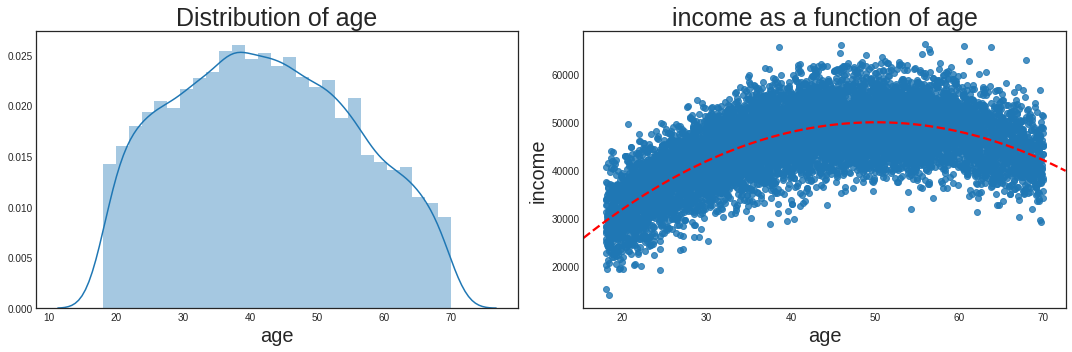

In [3]:
# Code that imports data and generate distribution plot as well as scatter plot along with f
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Styles for plots in the notebook
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20) 
plt.rc('legend', fontsize=20) 
plt.style.use('seaborn-white')
%matplotlib inline

path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv'
df = pd.read_csv(path_to_data)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), tight_layout=True)
sns.distplot(df['age'], ax=axs[0]).set_title('Distribution of age')
sns.regplot(x='age', y='income', data=df, ax=axs[1], order=2, ci=None, line_kws={'color':'red', 'ls':'--'}).set_title('income as a function of age')
plt.show();

- Usually, we do not know the whole population. Rather, we are working with a sample.
    - In this example, we will be working with a sample of 100 data points.
    - Our goal is to construct a model $\hat{f}(age)$ which makes "good" predictions about $income$
- Our sample is plotted below:

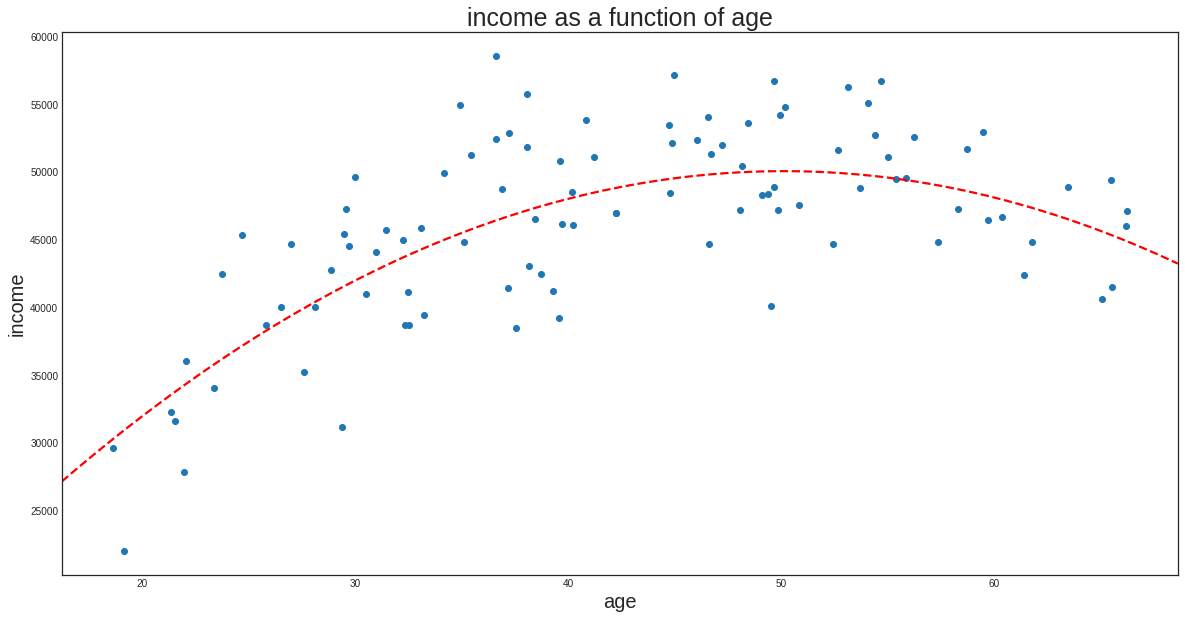

In [4]:
# Code that generates sample and plots it along with f
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(df['age'], df['income'], test_size=0.99, random_state=181)
plt.figure(figsize=(20,10))
plt.scatter(X, y)
sns.regplot(x='age', y='income', data=df, order=2, ci=None, scatter=None, line_kws={'color':'red', 'ls':'--'}).set_title('income as a function of age')
plt.show();

- In order to make predictions based on our sample, suppose we train two models:
    1. A simple linear regression: $$\hat{f}(age)=\hat{\beta}_0 + \hat{\beta}_1 age$$
    2. A 1NN regression
- Clearly, (1) is too inflexible and (2) is too flexible as illustrated in the following plots:

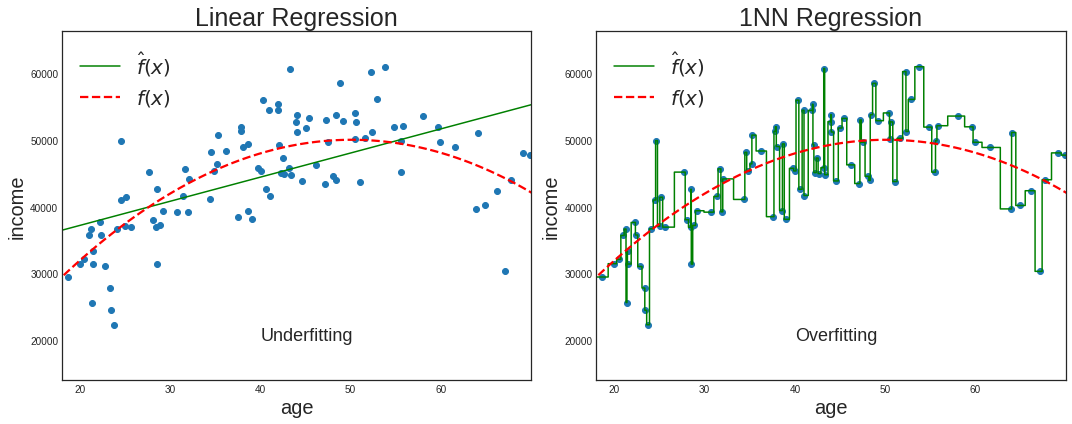

In [5]:
# Code that generates Linear and k nearest neighbor regression plots
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
reg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=1)
X, _, y, _ = train_test_split(df['age'], df['income'], test_size=0.99)
range_X = np.linspace(df['age'].min(), df['age'].max(), 1000)
X, y, range_X = X[:, np.newaxis], y[:, np.newaxis], \
                np.linspace(df['age'].min(), df['age'].max(), 1000)[:, np.newaxis]
y_hat_reg, y_hat_knn = reg.fit(X,y).predict(range_X), knn.fit(X,y).predict(range_X)
fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
title, fit = ['Linear Regression', '1NN Regression'], ['Underfitting', 'Overfitting']
axs[0].plot(range_X, y_hat_reg, c='g')
axs[1].step(range_X, y_hat_knn, c='g')
for i in range(len(axs)):
    axs[i].scatter(X,y)
    axs[i].set_title(title[i])
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('y')
    sns.regplot(x='age', y='income', data=df, order=2, ci=None, scatter=None, ax=axs[i], line_kws={'color':'red', 'ls':'--'})
    axs[i].text(40, 20000, fit[i], fontsize=18)
    axs[i].legend(labels=['$\hat{f}(x)$', '$f(x)$'])
    axs[i].set_xlim(df['age'].min(), df['age'].max())
    axs[i].set_ylim(df['income'].min(), df['income'].max())
plt.show();

- We saw that a simple linear regression makes bad predictions because it underfits our training data:
    - It has high bias and low variance.
- We saw that 1NN regression makes bad predictions because it overfits our training data:
    - It has low bias and high variance.
    
- Thus, when dealing with predictions, we face a trade-off:
    - The Bias-Variance Trade-off
- More formally, given a realized point $x_0$, the expected squared error is given by:
$$E[(y_0 -\hat{f}(x_0))^2]= Var[\hat{f}(x_0)] + [f(x_0)-E[\hat{f}(x_0)]]^2 + \sigma_\epsilon$$
- The first term is the variance of our model at $x_0$, the second the squared 
bias at $x_0$, and the third is the irreducible error.

Let us investigate this trade-off further by varying the number of neighbors in our regression:

In [6]:
# Code that generates figures updatable by slider
from sklearn.metrics import mean_squared_error as mse
from ipywidgets import interactive

X, _, y, _ = train_test_split(df['age'], df['income'], test_size=0.99, random_state=181)
range_X = np.linspace(df['age'].min(), df['age'].max(), 1000)
X, y, range_X = X[:, np.newaxis], y[:, np.newaxis], \
                np.linspace(df['age'].min(), df['age'].max(), 1000)[:, np.newaxis]
mse_f_train = mse(y, 2000*X - 20*X**2)
mse_f_test = mse(df['income'], 2000*df['age'] - 20*df['age']**2)
rrange = np.arange(1, 101, 3)

mses_train = np.empty(34)
mses_train[:] = np.nan

mses_test = np.empty(34)
mses_test[:] = np.nan

mses_test_f = np.empty(34)
mses_test_f[:] = np.nan

def plot_with_slider(k=1):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_hat_knn = knn.fit(X, y).predict(range_X)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
    axs[0].scatter(X, y, c='b', label='Sample')
    axs[0].scatter(df['age'], df['income'], c='grey', alpha=0.1, label='Population')
    mse_train = mse(y,knn.fit(X, y).predict(X))
    mse_test = mse(df['income'][:, np.newaxis],knn.fit(X, y).predict(df['age'][:, np.newaxis]))
    mses_train[k//3] = mse_train
    mses_test[k//3] = mse_test
    mses_test_f[k//3] = mse_f_test
    sns.regplot(x='age', y='income', data=df, order=2, ci=None, scatter=None, ax=axs[0], line_kws={'color':'red', 'ls':'--'})
    axs[0].step(range_X, y_hat_knn, c='g', label='$\hat{f}$')
    axs[0].set_title('{}NN Regression'.format(k))
    axs[0].legend(loc='lower right')
    axs[1].plot(rrange,mses_train, label= '{0}$NN$ Training MSE: {1:,.2f}'.format(k,mse_train))
    axs[1].plot(rrange,mses_test, label='${0}NN$ Test MSE: {1:,.2f}'.format(k,mse_test))
    axs[1].plot(rrange,mses_test_f, c='black', ls='--', label='$f$ Test MSE: {0:,.2f}'.format(mse_f_test))
    axs[1].set_xticks(rrange)
    axs[1].set_ylim(0, 80000000)
    axs[1].legend(loc='upper center')
    axs[1].set_xlabel('# of neighbors')
    axs[1].set_ylabel('MSE')
    plt.show()
    

interactive_plot = interactive(plot_with_slider, k=(1, 100, 3))
interactive_plot

interactive(children=(IntSlider(value=1, description='k', min=1, step=3), Output()), _dom_classes=('widget-int…

### Introduction to Sci-kit Learn (Linear Regression)
- Simple and efficient tools for data mining and data analysis
- It can be installed via Anaconda Navigator or via conda
- To fit a linear regression model on the data $X$ and $y$, we first import the class:
```
from sklearn.linear_model import LinearRegression
```
- Then we can perform a regression via the following code:
```
reg = LinearRegression().fit(X,y)
```
- We can then access one of its attributes to get the coefficients:
```
reg.coef_
```

### Introduction to Sci-kit Learn (Creating Train and Test sets)
- Suppose we have a data frame `df` consisting of two columns, $X$ and $y$.
- the dataset has 50,000 observations, and we would like a random training set consisting of 25,000 and a test set consiting of 25,000 observation.
- To do this, we first import the Class:
```
from sklearn.model_selection import train_test_split
```
- Then we create our training and test data:
```
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], train_size=0.5, random_state=181)
```

<center><div class="header1">
  <p>Your task</p>
</div>

<div class="content1">
1. Use your knowledge about $f$ to create a linear regression model and fit it on a sample consisting of 100 observations. The data is located at https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv<br><br>
2. Check the coefficients of your model. Are they close to those given in $f$?<br><br>
3. Write a for loop that generates a new sample 100 times of 100 observations. Store the coefficients of the model in each loop.<br><br>
4. Calculate the mean of each coefficient. Are the means close to the coefficients given in $f$?<br><br>
5. Using Seaborn's distribution plot, plot the distribution of the coefficients.
</div></center>

In [55]:
# Solution 1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv'

df = pd.read_csv(path_to_data)

df['age_sq'] = df['age']**2

from sklearn.model_selection import train_test_split

X, _, y, _ = train_test_split(df[['age', 'age_sq']], df['income'], train_size=0.01, random_state=181)

In [56]:
# Solution 2
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X,y)

reg.coef_

array([2291.49571737,  -23.28516076])

In [57]:
# Solution 3
beta_1 = []
beta_2 = []

for i in range(100):
    X, _, y, _ = train_test_split(df[['age', 'age_sq']], df['income'], train_size=0.01, random_state=i)
    reg = LinearRegression().fit(X,y)
    beta_1.append(reg.coef_[0])
    beta_2.append(reg.coef_[1])

In [58]:
# Solution 4
print(np.mean(beta_1))
print(np.mean(beta_2))

1998.0382588379416
-19.936625095326622


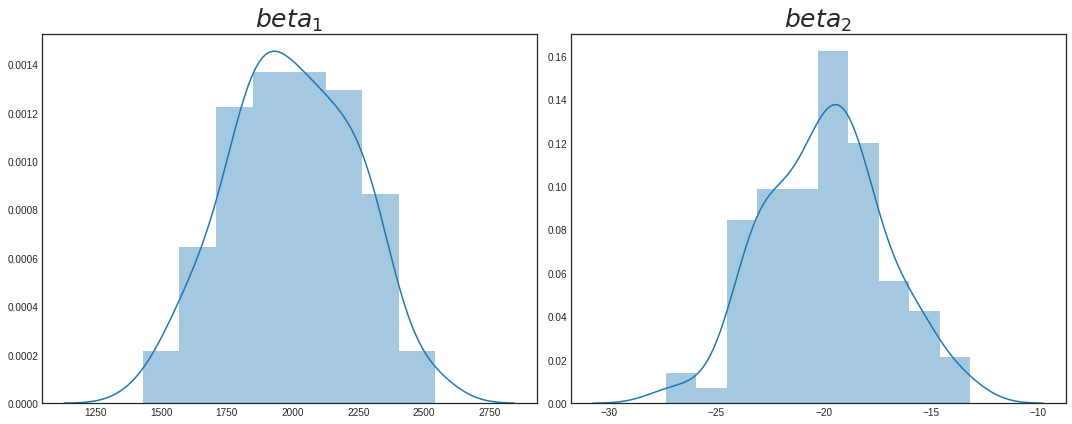

In [59]:
# Solution 5
fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
sns.distplot(beta_1, ax=axs[0]).set_title('$beta_1$')
sns.distplot(beta_2, ax=axs[1]).set_title('$beta_2$')
plt.show();

## Classification

### Bayes optimal classifier
Now $Y_i$ is qualitative.
- e.g. $Y_i \in \{spam, ham\}$ or $Y_i \in \{Business Administration, Economics, Informatics,...\}$

Suppose there are $B$ classes. We wish to build a classifier $f(X_i)$ that assigns a class label to a future unlabeled observation $X_i$.
- Let $p_b(x_i) = Pr(Y_i=b|X_i=x_i), b=1,...,B$
- Suppose we knew this conditional probability.
- Then, the *Bayes optimal classifier* at $x_i$ is given by:
$f(x_i) = b$ if $p_b(x_i) = \max\{p_1(x_i),...,p_B(x_i)\}$
- This is the optimal classifier in the sense that it maximizes expected accuracy.

### Estimating $f$ - $KNN$ Classification
We might attemp to apply $KNN$ once again to approximate the conditional probabilities:
1. Estimate $p_b(x_i), b=1,...,B$: $$\hat{p}_b(x_i)=\frac{1}{k}\sum_{x_j\in N_k}I(x_j=k)$$
    - Where $N_k$ is a neighborhood containing the $k$ closest $x's$.
2. Classify $x_i$ to the class with the highest estimated probability: 
$\hat{f}(x_i)=b$ if $\hat{p}_b(x_i)=\max\{\hat{p}_1(x_i),...,\hat{p}_B(x_i)\}$

### Estimating $f$ - Linear Regression
If $K=2$, we can convert the classes into 0's and 1's and perform linear regression.
- For example, $ham=0$, $spam=1$.
- Then we can treat the predictions as conditional probabilties.
- Finally, we classify $x_i$ to the class with the highest probability.

However, note that we might get probability estimates below zero and above one.

Furthermore, when $K>2$, the linear regression is no longer a good option becomes it imposes cardinality.

### Example
- Suppose for the same city "Python", our task is to predict whether or not a given individual defaults based on his/her income as well as credit card balance.
- The population is given below to the left and the sample to the right.
- The dash line is the (unknown) optimal decision boundary

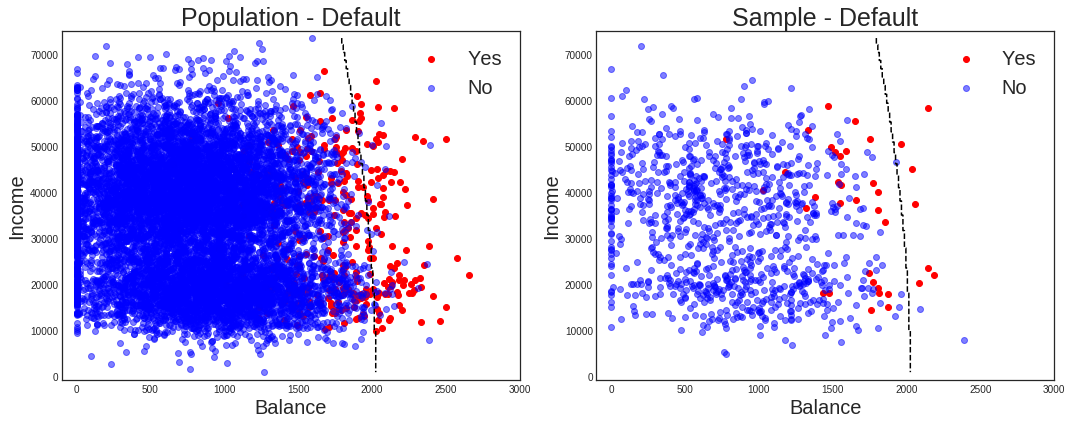

In [7]:
# code that generates population and sample plots with optimal decision boundary
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/Default.csv'
df = pd.read_csv(path_to_data, index_col=0)
df['default'] = pd.get_dummies(df['default'], drop_first=True)
X, test_X, y, test_y = train_test_split(df[['balance', 'income']], df['default'], test_size=0.9, random_state=181)
qda = QuadraticDiscriminantAnalysis().fit(test_X,test_y)
h = 10  # step size in the mesh
x_min, x_max = test_X['balance'].min() - 100, test_X['balance'].max() + 1
y_min, y_max = test_X['income'].min() - 1, test_X['income'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
YY = qda.predict(np.c_[xx.ravel(), yy.ravel()])
YY = YY.reshape(xx.shape)
fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
axs[0].scatter(df['balance'][df['default'] == 1], df['income'][df['default'] == 1], color='red', label = 'Yes')
axs[0].scatter(df['balance'][df['default'] == 0], df['income'][df['default'] == 0], color='blue', alpha=0.5, label = 'No')
axs[0].contour(xx, yy, YY, [0.5], colors='black', linestyles='dashed')
axs[0].set_title('Population - Default')
axs[1].scatter(X['balance'][y == 1],X['income'][y == 1], color='red', label = 'Yes')
axs[1].scatter(X['balance'][y == 0],X['income'][y == 0], color='blue', alpha=0.5, label = 'No')
axs[1].contour(xx, yy, YY, [0.5], colors='black', linestyles='dashed')
axs[1].set_title('Sample - Default')
for ax in axs:
    ax.legend()
    ax.set_ylabel('Income')
    ax.set_xlabel('Balance')
    ax.set_xlim(-100, 3000)
    ax.set_ylim(-1000, 75000)
plt.show()

- In order to make predictions based on our sample, suppose we train two models:
    1. A simple linear regression (i.e. where not default=0 and default=1)
    2. A 1NN regression
- Clearly, (1) is a bit too inflexible and (2) is too flexible as illustrated in the following plots:

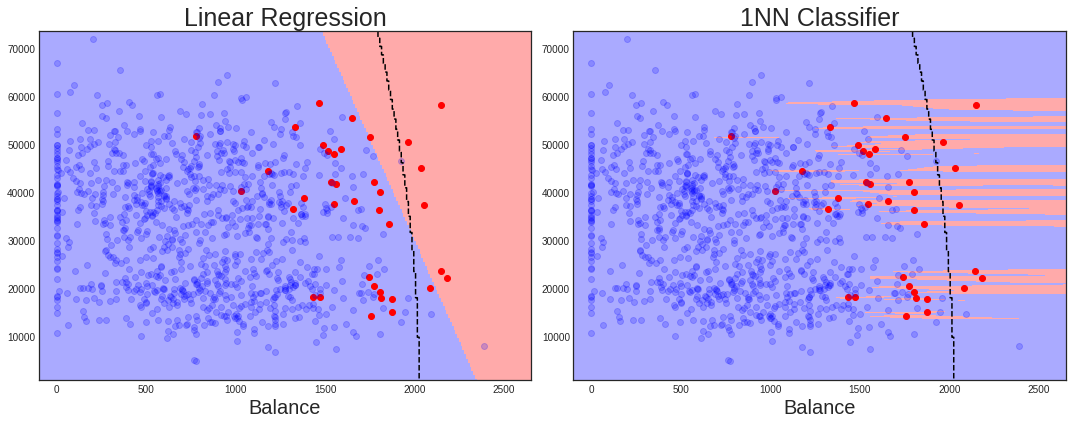

In [8]:
# Code that generates plots with Linear regression and KNN decision boundaries along with the optimal decision boundary
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
lda.fit(X, y).predict(X)
knn.fit(X, y).predict(X)
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
clfs = [lda, knn]
clfs_names = ['Linear Regression', '1NN Classifier']
for i in range(len(clfs)):
    Z = clfs[i].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[i].pcolormesh(xx, yy, Z, cmap=(cmap_light))
    YY = qda.predict(np.c_[xx.ravel(), yy.ravel()])
    YY = YY.reshape(xx.shape)
    axs[i].set_title(clfs_names[i])
    axs[i].contour(xx, yy, YY, [0.5], colors='black', linestyles='dashed')
    axs[i].scatter(X['balance'][y == 1],X['income'][y == 1], color='red', label = 'Yes')
    axs[i].scatter(X['balance'][y == 0],X['income'][y == 0], color='blue', alpha=0.2, label = 'No')
    axs[i].set_xlabel('Balance')
    axs[i].set_xlabel('Balance')   

### Introduction to Sci-kit Learn (KNN Classification)
- To perform KNN classification, we first import the KNN class and then fit the model:
```
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=n)
clf.fit(X,y)
```
- To predict and evaluate the performance on our test set, we do the following:
```
y_pred = clf.predict(test_X)
y_score = clf.score(test_X, test_y)
```

<center><div class="header1">
  <p>Your task</p>
</div>

<div class="content1">
1. Import the data and modify the column 'default' such that it is a dummy variable. The data is located at https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/Default.csv<br><br>
2. Create a training sample consisting of 1,000 observations where $y$ is the column 'default' and X 'balance' and 'income'. Fit a 1NN classifier to the training data. Evaluate its performance on both the training and test set.<br><br>
3. Write a for loop that performs an $i$NN regression, where i goes from 1 to 50. Store the score of the model on both the training and test set in each step of the loop.<br><br>
4. Plot the training and test error rate with # of neighbors on the x-axis and error rate on the y-axis.
</div></center>

In [9]:
# Solution to 1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/Default.csv'

df = pd.read_csv(path_to_data, index_col=0)
df['default'] = pd.get_dummies(df['default'], drop_first=True)

In [10]:
# Solution 2
X, test_X, y, test_y = train_test_split(df[['balance', 'income']], df['default'], test_size=0.9, random_state=181)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

knn.fit(X, y).predict(test_X)

print('Training error:', knn.score(X, y))
print('Test error:', knn.score(test_X, test_y))

Training error: 1.0
Test error: 0.9542222222222222


In [11]:
# Solution 3

test_score = []
train_score = []
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X, y).predict(test_X)
    train_score.append(knn.score(X, y))
    test_score.append(knn.score(test_X, test_y))

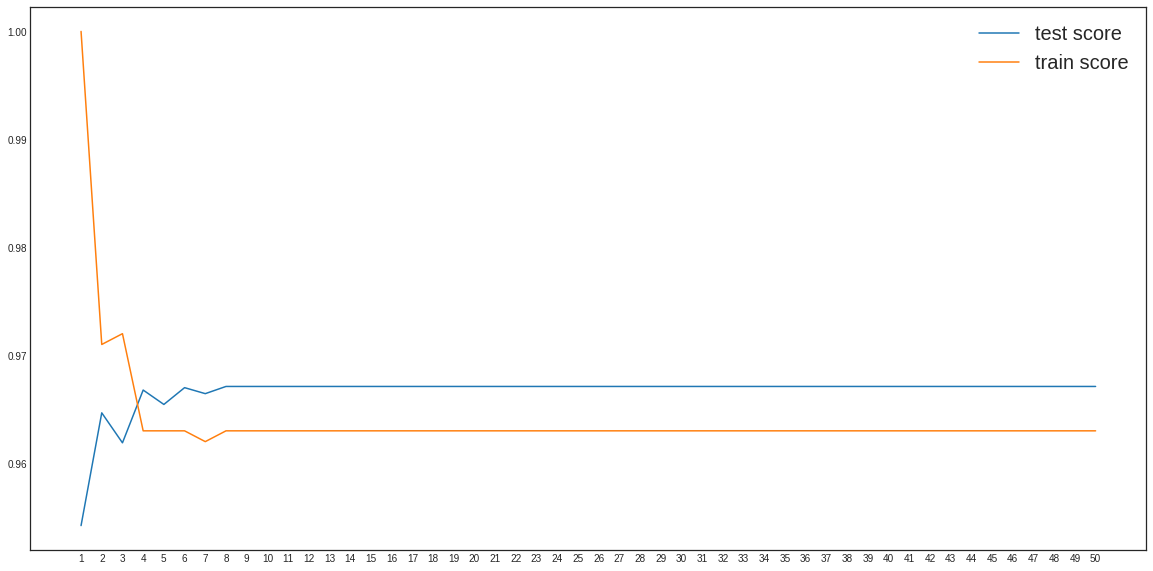

0.9667

In [12]:
plt.figure(figsize=(20,10))
xrange = np.linspace(1, 50)
plt.plot(xrange, test_score, xrange, train_score)
plt.legend(labels=['test score', 'train score'])
plt.xticks(np.arange(1,51))
plt.show();
1- np.mean(df['default'])


## Model Selection and Assesment

### General performance of our model
- Assessment of the general performance of our model is what we truly care about.
- The general performance of a model refers to its prediction/classification ability on independent test data
    - Or, more generally, its capability on the population.
    
    
- A model's capability on the training data is a biased estimate of it general performance.
    - Why?
    
- If we can estimate models' general performance, we:
    1. can select the optimal one for our problem;
    2. know this optimal model's performance on unseen test data

### Types of errors
- We will consider the prediction setting in which the performance is evaulated using the squared error
- The *training error* of a model $\hat{f}$ trained on a training set $T$ is simply the mean squared error in our sample:
\begin{equation}
\bar{err} = \frac{1}{N}\sum_{i=1}^{N}(y_i- \hat{f}(X_i))²
\end{equation}


- The *test error* or *generalization error* is the expected squared error for a new observation from the population, conditional on being trained on $T$:
\begin{equation}
Err_T = E[(Y_0- \hat{f}(X_0))²|T]
\end{equation}


- Finally, the *expected test error* or *expected generalization error* is the expected error for a new observation over everything that is random - including the training set $T$:
\begin{equation}
Err = E[E[(Y_0- \hat{f}(X_0))²|T]] = E[(Y_0- \hat{f}(X_0))²]
\end{equation}

### Goals
- Often our model will have a hyperparameter or parameters.
    - For example, the # of neighbors in the KNN regression.
    
    
- Hyperparameters are parameters of our model not learned by fitting it to the data.
    - Thus, the $\beta$-coefficients of a linear regression are not hyperparameters.
    
    
- We wish to find the model and corresponding hyperparameter(s) that minimizes the generalization error and estimate this model's generalization error:

__1. Model selection:__ Estimating the performance of different models and their corresponding hyperparameters in order to choose the best one.

__2. Model assessment:__ Having chosen a final model, estimating its generalization error.


### Validation-Set Approach (without model selection)
**Idea**: _Estimate the test error by holding out observations from our sample_
<figure>
<center><img src="https://github.com/jeshan49/EEMP2019/raw/master/content/part-5/part-5-1/5_1-1.png" alt="Alt text that describes the graphic" title="Title text" />
    <figcaption>Source: ISLR ch. 5</figcaption></center>
</figure>

**Approach:**
1. Randomly divide the sample into two parts: A training set and a validation or hold-out set.
2. The model is fitted on the training set, and the fitted model is used to predict the target for the for the observations in the validation set.
3. The resulting validation-set mean squared error provides an unbiased estimate of the *test error*.

### Validation-Set Approach (with model selection)
<br>

<figure>
<center><img src="https://github.com/jeshan49/EEMP2019/raw/master/content/part-5/part-5-1/vs.png" alt="Alt text that describes the graphic" title="Title text" />
<figcaption>Source: https://tarangshah.com/blog/2017-12-03/train-validation-and-test-sets/</figcaption></center>
</figure>

**Approach:**
1. Randomly divide the sample into three parts: A training set $(\sim 50\%)$, a validation set $(\sim 25\%)$, and a test set $(\sim 25\%)$.
2. The models are fitted on the training set, and the fitted models are used to predict the target for the for the observations in the validation set.
3. The model with the lowest estimated error is used to predict the target for the observations in the test set.
3. The resulting test set mean squared error provides an unbiased estimate of the *test error*.

### Introduction to Sci-kit Learn (KNN Regression)
- To fit a KNN regression model on the data $X$ and $y$, we first import the class:
```
from sklearn.neighbors import KNeighborsRegressor
```
- Then we can perform a regression via the following code:
```
reg = KNeighborsRegressor(n_neighbors=n).fit(X,y)
```
- To evaluate its mean squared error on the training data, $X$ and $y$, we first import the metric:
```
from sklearn.metrics import mean_squared_error as MSE
```
- Then, we get the predictions on the training data and evaluate the mean squared error:
```
y_pred = reg.predict(X)
train_mse = MSE(y, y_pred)
```
- Analogously on the test data:
```
test_y_pred = reg.predict(test_X)
train_mse = MSE(test_y, test_y_pred)
```
- NOTE: If $X$ is a single column from a DataFrame, it needs to be resized:
```
 X = X[:,np.newaxis]
```

<center><div class="header1">
  <p>Your task</p>
</div>

<div class="content1">
1. Import the income data. The data is located at https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv<br><br>
2. Create a random training set and a test set. The training set and test set should contain 50 observations each.<br><br>
3. Fit a 1NN regression of income on age to the training data. Evaluate its performance on the test set. Is the estimate close to its true test error?<br><br>
4. Now create a random training, validation and test set. The training set should contain 50 observations, whereas the validation and test set should contain 25 observations each.<br><br>
5. Write a for loop that performs an $i$NN regression on the training data, where i goes from 1 to 10. Store the error of each model on the validation set.<br><br>
6. Fit the best model on both the training and validation set and evaluate its performance on the test set. Is the estimated error close to the estimated error of the model on the validation set?
</div></center>

In [13]:
# Solution to 1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv'

df = pd.read_csv(path_to_data)
## Resizing X:
X = df['age'][:, np.newaxis]
y = df['income']

In [14]:
# Solution to 2
### initial split:
from sklearn.model_selection import train_test_split
X, pop_X, y, pop_y = train_test_split(X, y, train_size=0.01, random_state=181)
### second split:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=181)

In [16]:
# Solution to 3
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=1).fit(train_X, train_y)
from sklearn.metrics import mean_squared_error as MSE
y_pred_train = reg.predict(train_X)
print('train mse:', MSE(train_y, y_pred_train))
y_pred_test = reg.predict(test_X)
print('test mse:', MSE(test_y, y_pred_test))
reg.fit(X,y)
y_pred_pop = reg.predict(pop_X)
print('pop mse:', MSE(pop_y, y_pred_pop))

train mse: 0.0
test mse: 43200350.18989243
pop mse: 45098928.540674396


In [17]:
# Solution to 4
train_val_X, test_X, train_val_y, test_y = train_test_split(X, y, train_size=0.75, random_state=181)
train_X, val_X, train_y, val_y = train_test_split(train_val_X, train_val_y, train_size=2/3, random_state=181)

In [18]:
# Solution to 5
val_mses = []
neighbors = []
for i in range(1, 11):
    neighbors.append(i)
    reg = KNeighborsRegressor(n_neighbors=i).fit(train_X, train_y)
    y_pred = reg.predict(val_X)
    val_mses.append(MSE(val_y, y_pred))

In [19]:
# Solution to 6
best_model = neighbors[np.argmin(val_mses)]
best_model_mse = np.min(val_mses)

reg = KNeighborsRegressor(n_neighbors=best_model).fit(train_val_X, train_val_y)
y_pred = reg.predict(test_X)
print('validation error:', best_model_mse)
print('test error:', MSE(test_y, y_pred))

reg.fit(X,y)
y_pred = reg.predict(pop_X)
print('true error:', MSE(pop_y, y_pred))

validation error: 21750780.710403617
test error: 25964882.623192254
true error: 32395475.941630047


### K-fold Cross Validation (CV)
- The validation-set approach has an obvious drawback: Results may heavily depend on the chosen split.
- To mediate this, we typically employ K-fold Cross Validation (CV).

__Approach:__

1. Randomly split the data into $K$ roughly equal-sized parts (folds)
2. For each $k=1,...,K$:
    - Leave out part $k$ and fit the model using the other $K-1$ part
    - Calculate the mean squared error of model $k$ on the held out data (i.e. part $k$)
    - Store this mean squared error as $MSE_k$
    
    
3. The average of the $K$ MSE's provides an estimate of the *expected test error*:
$$CV(\hat{f})=\frac{1}{K}\sum_{k=1}^{K}MSE_k$$

### Leave-Out-One CV (LOOCV)
- If $K=N$, we have LOOCV.
- LOOCV is an approximately unbiased estimate of $Err$ (i.e. low bias) since each $K$ parts contain $N-1$ observations.


- However, LOOCV can suffer from high variance:
    - We are averaging over $N$ fitted models with almost identical observations.
    - Thus, our outputs will be highly positively correlated with each other.
    
    
- Additionally, LOOCV can be very computationally expensive since we are fitting $N$ models.

### Which value of $K$ should we choose?
- We have seen that $K=N$ is approximately biased, but can suffer from high variance.
- The optimal choice of $K$ depends on the slope of the learning curve (displayed below)

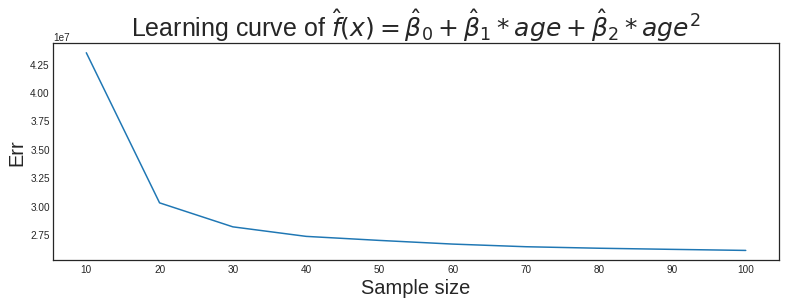

Err at sample size 100: 26047697


In [21]:
# Code that generates learning curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv'
df = pd.read_csv(path_to_data)
df['age_sq'] = df['age']**2

sample_fraction = np.linspace(0.001, 0.01, 10)
mses = []
for sample in sample_fraction:
    temp_mses = []
    for i in range(1000):
        X, _, y, _ = train_test_split(df[['age', 'age_sq']], df['income'], train_size=sample)
        reg = LinearRegression().fit(X,y)
        y_pred = reg.predict(df[['age', 'age_sq']])
        temp_mses.append(MSE(y_pred,df['income']))
    mses.append(np.mean(temp_mses))
    
plt.figure(figsize=(13,4))    
plt.plot(sample_fraction*len(df['income']), mses)
plt.xlabel('Sample size')
plt.xticks(sample_fraction*len(df['income']))
plt.ylabel('Err')
plt.title(r'Learning curve of $\hat{f}(x)=\hat{\beta}_0 + \hat{\beta}_1 * age + \hat{\beta}_2 * age^2$')
plt.show();
print('Err at sample size 100:', int(mses[-1]))

- We want to pick a $K$ such that the learning capability is close to its full capability.
- If we pick a $K$ where the learning curve is steep, our estimate will be biased.
- However, the learning curve is unknown, so 5- or 10-fold CV are recommended as a good comprise between bias and variance.

### Choosing hyper parameters with CV
- Often we consider a class of models with one or more hyper parameters.
    - E.g., # of neighbors in a KNN regressor
- Denote by $MSE_k^\alpha$ the mean squared error on the $k-th$ fold of a model with hyper parameter(s) $\alpha$ fitted $K-1$ parts of the data.
- Then, the average of the $K$ $MSE_k^{\alpha}$ provides an estimate of the test error of $\hat{f}$ with hyper parameter(s) $\alpha$:
$$CV(\hat{f},\alpha)=\frac{1}{K}\sum_{k=1}^{K}MSE_{k}^{\alpha}$$


- We can then try out multiple $\alpha$ a pick the one that has the minimum error.
- However, often we employ the so-called "one standard error rule":
*Choose the simplest model with error no more than one standard error above the best error.*

### Example
- Let us go back to the problem of predicting an individual's income as a function of his/her age.
    - Suppose we wish to employ linear regression, but we want to use CV to find the optimal polynomial degree of our regression.
- The CV error estimates for polynomial degree of 0 to 9 are given in the plot below.

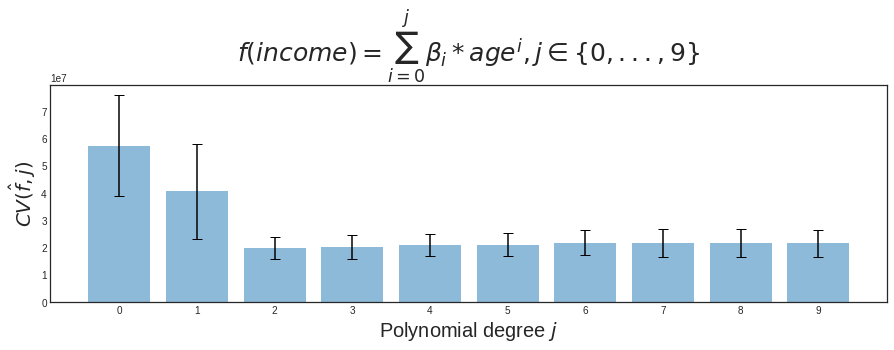

Best model: PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')  
 Score: 19951369


In [26]:
# Code that calculates and plots CV(f,a) for polynomial regressions
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

X, _, y, _ = train_test_split(df['age'][:,np.newaxis], df['income'], train_size=0.01, random_state=36)

def PolynomialRegression(degree=1, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(10)}

poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')

poly_grid.fit(X,y)

list(poly_grid.best_estimator_)[0]

poly_grid.best_score_*-1

poly_grid.cv_results_['mean_test_score']

poly_grid.cv_results_['std_test_score']

plt.figure(figsize=(15,4))  
plt.bar(np.arange(10), poly_grid.cv_results_['mean_test_score']*-1, yerr=poly_grid.cv_results_['std_test_score'], alpha=0.5, capsize=5)
plt.xlabel('Polynomial degree $j$')
plt.xticks(np.arange(10))
plt.ylabel(r'$CV(\hat{f},j)$')
plt.yticks(np.arange(8)*1e7)
plt.title(r'$f(income)=\sum_{i=0}^{j}\beta_i *age^i, j\in\{0,...,9\}$')
plt.show();
print('Best model:', list(poly_grid.best_estimator_)[0],' \n Score:', int(poly_grid.best_score_*-1))

### Drawbacks of CV
- Recall that in the validation-set approach: Using the validation set for both model selection and model assessment risks underestimating the true test error of the best model.
- The same is true for CV. In fact, it is true in the example we went through here.
- So what can we do about this problem?


- Most common approaches:
    - Leave out a test set before conducting CV. Then fit the best model to all $K$ parts of the training data and test its performance on the test data.
    - Nested CV - The outer CV serves as model assessment and on each fold we perform an inner CV for model selection.

### Introduction to Sci-kit Learn (GridSearchCV)
- To use GridSearchCV, we first import the class as well as the class of the estimator we wish to use (e.g. KNN regression):
```
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
```
- Then we create a parameter grid as a dictionary with the hyperparameters we want to optimize over. For example, with a KNN regression:
```
param_grid = {'n_neighbors': np.arange(1,50)}
```
- Now we can perform our CV using GridSearchCV and specifying: 'estimator', 'parameter grid', '# of cv folds', 'scoring rule':
```
knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
```
- NOTE: we have to use negative MSE when we apply GridSearchCV!
- We can get the best estimator and its score, respectively, as follows:
```
knn_grid.best_estimator_
knn_grid.best_score_*-1
```

<center><div class="header1">
  <p>Your task</p>
</div>

<div class="content1">
1. Import the income data. The data is located at https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv<br><br>
2. Create a training sample consisting of 100 observations where $y$ is the column 'income' and X 'age'.
3. Using GridSearchCV, find the optimal KNN regressor where $K=1,...,10$. Print the CV error estimate of the best model.<br><br>
3. Get the true error from the best model you found using GridSearchCV. Does the CV error under- or overestimate this error? What would be the solution to this problem?
</div></center>

In [23]:
# Solution 1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv'

df = pd.read_csv(path_to_data)
## Resizing X:
X = df['age'][:, np.newaxis]
y = df['income']

In [24]:
# Solution 2
X, pop_X, y, pop_y = train_test_split(X, y, train_size=0.01, random_state=181)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,11)}

knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

knn_grid.fit(X, y)

print('Best model:', knn_grid.best_estimator_)

print('CV err:', knn_grid.best_score_*-1)

Best model: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')
CV err: 23420490.623184852


In [25]:
# Solution 3
y_pred = knn_grid.predict(pop_X)

print('true error:', MSE(pop_y, y_pred))

true error: 29395944.029726144


## Decision Trees
- Decision trees are versatile ML algorithms that can perform both classification and regression tasks.
- A decision tree is a tree-based method - this involves stratifying or segmenting the feature space into a number of simple regions.
- After this split, we typically make predictions based on the mean or mode response value in the regions.
- The set of splitting rules used to segment the feature space can be summarized in a tree.
- Decisions trees are the fundamental components of *Random Forests* which are among the most powerful ML algorithms available.

### Example
- Here we perform a decision tree regression on our income data, where we restrict the depth of the tree:

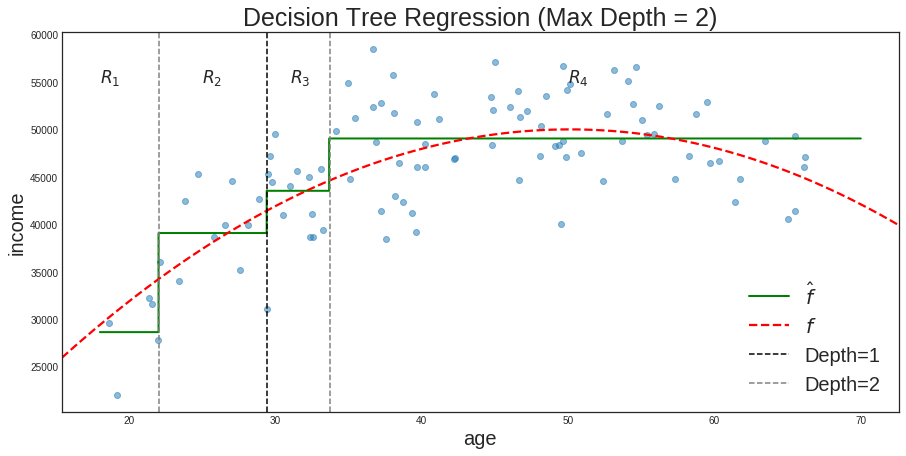

In [28]:
# Code that plots decision tree regression with max depth = 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

path_to_data = 'https://raw.githubusercontent.com/jeshan49/EEMP2019/master/content/part-5/part-5-1/income.csv'

df = pd.read_csv(path_to_data)

from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=2)
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(df['age'][:,np.newaxis], df['income'], train_size=0.01, random_state=181)

regr.fit(X,y)
thres = regr.tree_.threshold[regr.tree_.threshold>0]
y_pred = regr.predict(np.linspace(df['age'].min(), df['age'].max(), 1000)[:,np.newaxis])
plt.figure(figsize=(15,7))  
plt.scatter(X, y, alpha=0.5)
plt.step(np.linspace(df['age'].min(), df['age'].max(), 1000)[:,np.newaxis], y_pred, c="g", label=r'$\hat{f}$', linewidth=2)
sns.regplot(x='age', y='income', data=df, order=2, ci=None, scatter=None, line_kws={'color':'red', 'ls':'--'}, label=r'$f$')
plt.axvline(x=thres[0],ymin=0,ymax=1, color='black', label='Depth=1', linestyle='--')
plt.axvline(x=thres[1],ymin=0,ymax=1, color='grey', label='Depth=2', linestyle='--')
plt.axvline(x=thres[2],ymin=0,ymax=1, color='grey', linestyle='--')
plt.text(31, 55000, r'$R_3$', fontsize=17)
plt.text(25, 55000, r'$R_2$', fontsize=17)
plt.text(50, 55000, r'$R_4$', fontsize=17)
plt.text(18, 55000, r'$R_1$', fontsize=17)
plt.title('Decision Tree Regression (Max Depth = 2)')
plt.legend()
plt.show()

### Example (Cont'd)
- Here the same regression visualized as a tree:

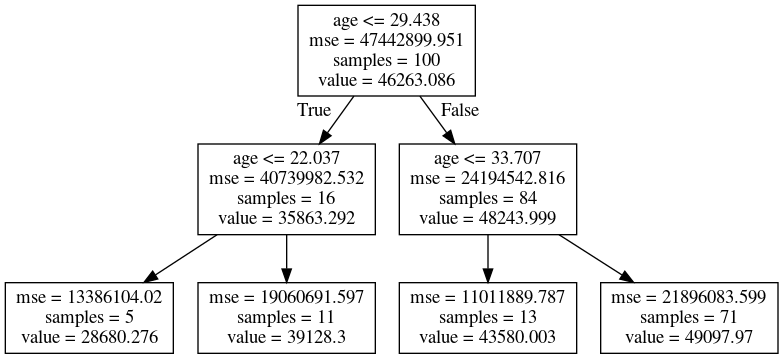

In [14]:
# Code that creates a figure of the tree of the regression
from IPython.display import Image 
from sklearn import tree
import pydotplus
# conda install -c conda-forge pydotplus

# Create DOT data
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=[df.columns[0]],  
                                class_names=df.columns[1])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Terminology
- The regions (e.g., $R_1,R_2,R_3,R_4$) are known as the _leaves of the three_ (or _terminal nodes_ ).
- The points along the three where the feature space is split (e.g., age<=22.037) are known as _internal nodes_.
- The _initial node_ (e.g., age <= 29.438) is also sometimes referred to as the _root node_.
- The segments of the three that connects the nodes are called _branches_.
- Note: The three is usually displayed upside down.

### The optimal regression tree
How do we build regression threes?
1. We divide the feature space $X_i$ into $J$ distinct and non-overlapping regions $R_1,...,R_J$
2. For every observation that lies in $R_j$, we predict the mean of the $y_i$ of the observations in $R_j$.
- For example, if an individuals age is below 22, then we would predict an income of 28,680.28.

But how do we divide the feature space into $J$ regions?
- Optimally, we find the $J$ regions $R_1,...,R_J$ that minimizes
$$ \sum_{j=1}^{J}\frac{N_j}{N}\frac{1}{N_j}\sum_{i\in R_j}(y_i-\hat{y}_{R_j})² = \sum_{j=1}^{J}\frac{N_j}{N} MSE_j$$
- Where $\hat{y}_{R_j}$ is the mean $y_i$ for training observations within region $R_j$.
- In other words: the $J$ regions that minimizes the weighted mean squared error.

### The alternative
Unfortunately, that division approach is computationally infeasible. Instead we apply a _top-down, greedy_ approach known as _recursive binary splitting_ :
- Step 1: We split the feature space into two regions in a way that minimizes the resulting weighted mean squared error.
    - That is, we split the space such that we minimize:
    $$ \frac{N_1}{N}\frac{1}{N_1}\sum_{i\in R_1}(y_i-\hat{y}_{R_1})² + \frac{N_2}{N}\frac{1}{N_2}\sum_{i\in R_2}(y_i-\hat{y}_{R_2})²$$
- We iterate this step with its regions, until we have $J$ regions.

With the optimization in place, one question remains: _How do we choose $J$?_

### Example
- If we do not restrict $J$, the algorithm will run until no further improvements can be made.
- However, not restricting $J$ will most likely result in overfitting as shown on our income data below:

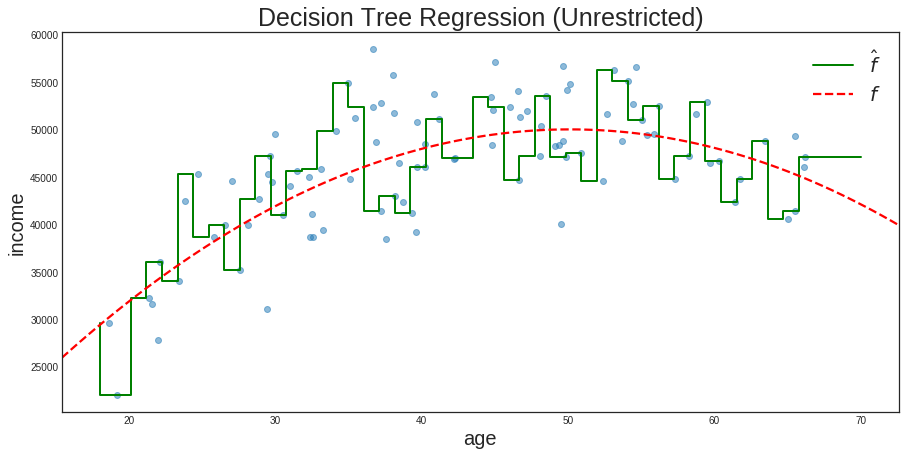

In [25]:
# Code that the unrestricted decision tree regression
regr = DecisionTreeRegressor()
regr.fit(X,y)
thres = regr.tree_.threshold[regr.tree_.threshold>0]
y_pred = regr.predict(np.linspace(df['age'].min(), df['age'].max())[:,np.newaxis])
plt.figure(figsize=(15,7)) 
plt.scatter(X, y, alpha=0.5)
plt.step(np.linspace(df['age'].min(), df['age'].max())[:,np.newaxis], y_pred, c="g", label=r'$\hat{f}$', linewidth=2)
sns.regplot(x='age', y='income', data=df, order=2, ci=None, scatter=None, line_kws={'color':'red', 'ls':'--'}, label=r'$f$')
plt.title('Decision Tree Regression (Unrestricted)')
plt.legend()
plt.show()

### Example (Cont'd)
- The reason that the tree is overfitting is the relative ease of continously splitting the features into smaller regions (containing very few observations) as is shown below:

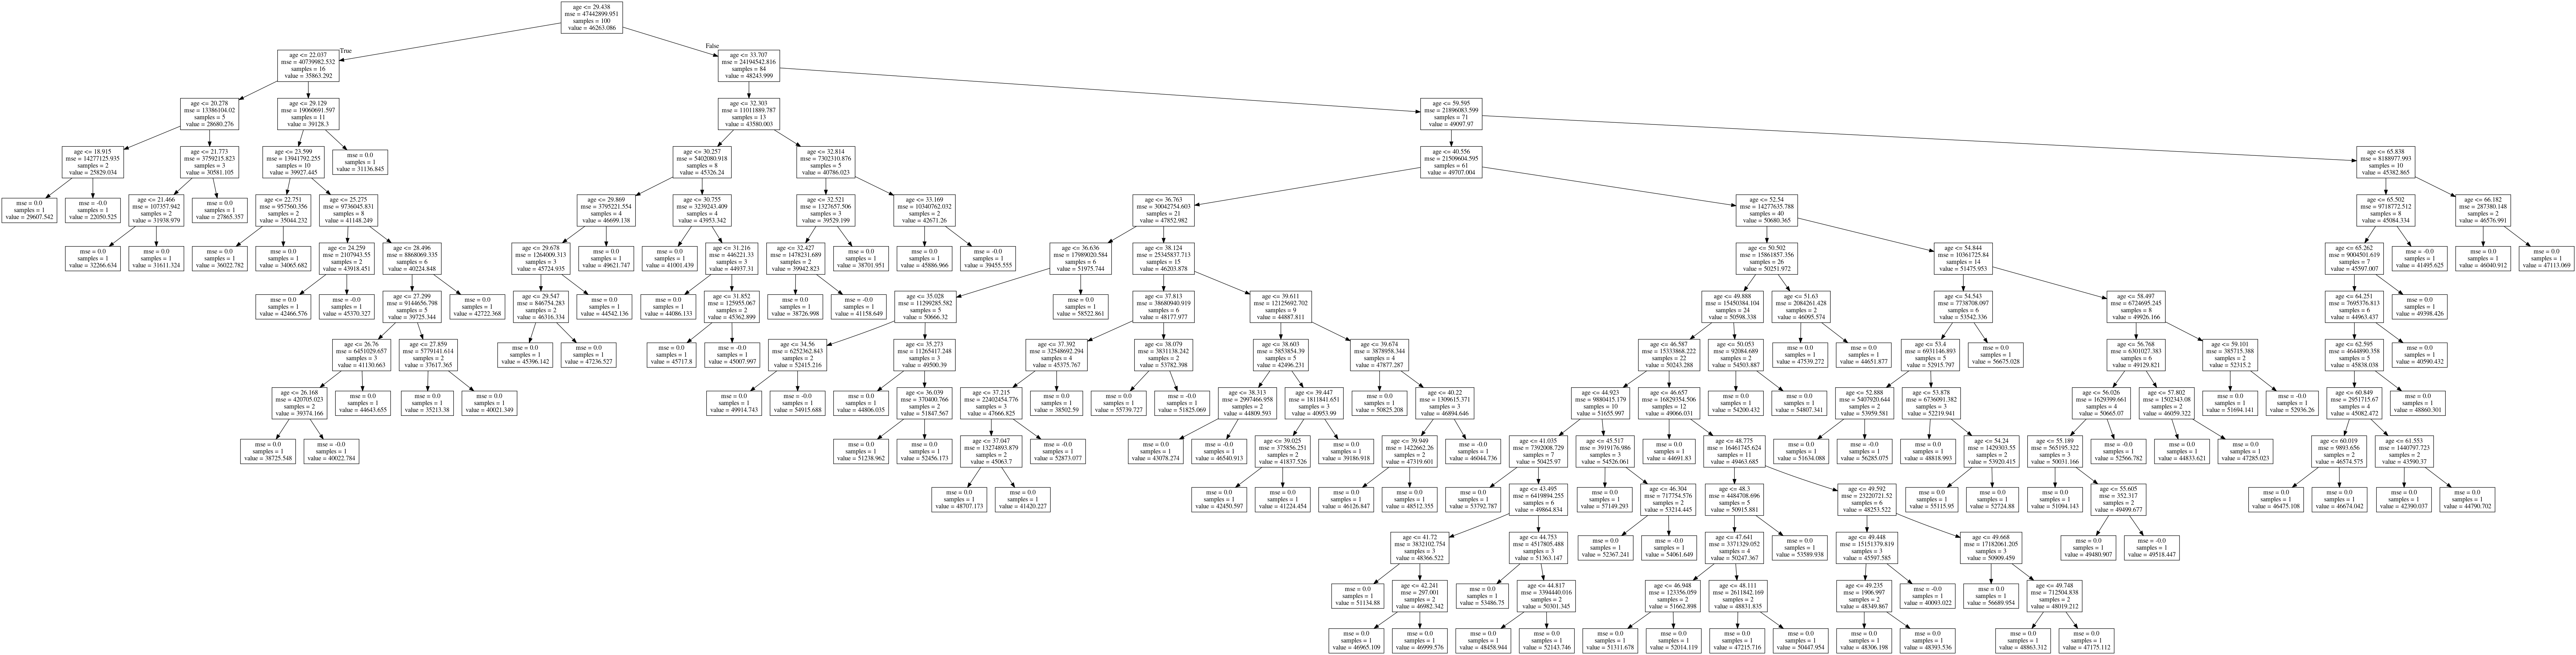

In [23]:
# Code that creates a figure of the tree of the regression
from IPython.display import Image 
from sklearn import tree
import pydotplus
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=[df.columns[0]],  
                                class_names=df.columns[1])
 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### How to avoid overfitting
There are different ways to overcome the overfitting problem of decision trees:
1. Cost Complexity Pruning (CCP): We grow the largest tree possible (as above) and then we find the optimal subtree that minimizes a loss function with a penalty term increasing in the size of the tree.
2. Create a range for different criteria such as _maximum depth_ and _minimum samples per leaf_. Then employ CV for each of the possible values to find the optimal model.

As CCP is not yet a possibility in the stable version of Sci-Kit Learn, we will use the second method here.

### Instability
Decision trees are simple, easy to interpret, and versatile. However:
- They are very sensitive to small variations in the data.
    - Removing one observation may substantially change the tree &rarr; high variance.
    

- The decision boundary have to be orthogonal to the feature axis.
    - Thus, they are sensitive to the rotation of the data.
    

- In many applications, decision trees' predictive ability is below that of other well-known ML methods.
- However, as we shall see, we can use them as a building block to construct more powerful methods.

### Introduction to Sci-kit Learn (Decision trees)
- To perform a decision tree regression in sci-kit learn, we first import the class:
```
from sklearn.tree import DecisionTreeRegressor
```
- Then we can train the model on our X and y, while specifying the maximum depth:
```
reg = DecisionTreeRegressor(max_depth=2).fit(X,y)
```
- To evaluate its performance on our test set, we follow the standard method:
```
from sklearn.metrics import mean_squared_error as MSE
y_pred_test = reg.predict(test_X)
print('test mse:', MSE(test_y, y_pred_test))
```
- Finally, if we would like to display our fitted tree, we can do as follows:
```
dot_data = tree.export_graphviz(reg, out_file=None, feature_names=X_cols, class_names=['Name_Of_y'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 
# Show graph
Image(graph.create_png())
```

<center><div class="header1">
  <p>Your task</p>
</div>

<div class="content1">
1. Import the employee data that you worked with in your first session. The data is located at https://raw.githubusercontent.com/lemepe/EEMP/master/python_intro/Employee_data.csv<br><br>
2. Our task in this exercise will be to predict an employees 'JobSatisfaction' based on the features: 'Age', 'Education', 'Gender', 'JobLevel', 'MaritalStatus', 'DistanceFromHome', 'WorkLifeBalance'. Create a smaller dataframe consisting only of these columns. Furthermore, create dummy variables for the features: 'Gender' and 'MaritalStatus'. (Note: 'MaritalStatus takes three values)
3. See how 'JobSatisfaction' correlates with the features in your new dataframe using the .corr() method.<br><br>
4. Split the data into a training set consisting of 75% of the data and a test set consiting of 25%.
<br><br>
5. Fit a decision tree with maximum depth of 2 on the training data and display it. Print its MSE on the training data as well as on the test data. Compare its performance on the test data to a simple linear regression.
<br><br>
6. Now use GridSearchCV to find the optimal decision tree with maximum depth ranging between 1 and 20. Display the optimal tree and print its performance on the test set. How does it compare to the simple linear regression's performance?
</div></center>

## Bootstrap Aggregating

## Boosting

## References
- James, Gareth, et al. An introduction to statistical learning. Vol. 112. New York: springer, 2013.
    - Ch. 1-2, 4-5, 8
- Géron, Aurélien. Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.", 2017.
    - Ch. 6-7
- Angrist, Joshua D., and Jörn-Steffen Pischke. Mostly harmless econometrics: An empiricist's companion. Princeton university press, 2008.
    - Ch. 3.1
- Pedregosa, Fabian, et al. "Scikit-learn: Machine learning in Python." Journal of machine learning research 12.Oct (2011): 2825-2830.